# Programming for Data Analytics Project 2020
***



### Project brief

For this project you must create a data set by simulating a real-world phenomenon of your choosing.  You may pick any phenomenon you wish. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the `numpy.random` package for this purpose. Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate  the  types  of  variables  involved,  their  likely  distributions,  and  their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

<br>



## Introduction

I have divided this project into 4 sections, each one representing a bullet point listed in the brief above. 


<br>



## 1. Premier League Simulation
***

For this project, I simulate the phenomenon of home team performance in the Premier League. The simulation is modelled on data from the 2018/19 Premier League season [1]. I use a data set which consists of 380 observations (representing each individual match that took place during the season). On a personal level, the most interesting variable is the result of each match (win, loss or draw). More specifically, I am curious to investigate some of the variables which may give an indication as to the outcome of a match. I have chosen the following 4 variables with this in mind

* Goals scored (non-zero integer)
* Possession (non-zero integer)
* Shots (non-zero integer)
* Result (categorical)

In order to accurately simulate the real world data, it is necessary to examine the properties of these variables. This includes establishing the distribution of each one as well as the relationship between each of the them. 
<br>







<br>

***

## 2. Investigation of variables
***

<br>

Firstly, I import the relevant Python packages for the simulation. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br>

Next, I read in the csv file which contains the necessary real world data and perform some basic operations on it to get an overview of the data.

In [2]:
# Read in csv file
df = pd.read_csv("pl_stats.csv.html")

In [3]:
# The .describe() method gives a summary of the data contained in the data set
df.describe()

,timestamp,attendance,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),home_ppg,away_ppg,home_team_goal_count,away_team_goal_count,total_goal_count,...,average_cards_per_match_pre_match,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no
count,3.800000e+02,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.546145e+09,38186.847368,19.500000,1.480895,1.167632,1.615500,1.198000,1.568421,1.252632,2.821053,...,3.354763,3.219421,4.471316,5.381816,1.261000,1.821474,3.101158,5.897763,1.842316,1.908868
std,6.877351e+06,16720.334767,10.980313,0.831446,0.761209,0.590587,0.534085,1.312836,1.180031,1.601312,...,1.169849,2.962683,1.906924,5.540953,0.107498,0.312900,0.833400,2.032061,0.214528,0.228041
min,1.533928e+09,9980.000000,1.000000,0.000000,0.000000,0.470000,0.260000,0.000000,0.000000,0.000000,...,0.000000,1.070000,2.900000,1.120000,1.050000,1.200000,1.540000,2.300000,1.430000,1.380000
25%,1.540656e+09,25034.750000,10.000000,1.000000,0.630000,1.210000,0.840000,1.000000,0.000000,2.000000,...,2.922500,1.570000,3.350000,2.300000,1.180000,1.585000,2.450000,4.437500,1.690000,1.740000
50%,1.546018e+09,31948.000000,19.500000,1.470000,1.075000,1.475000,1.160000,1.000000,1.000000,3.000000,...,3.500000,2.300000,3.750000,3.350000,1.250000,1.770000,2.950000,5.500000,1.830000,1.890000
75%,1.551541e+09,53282.750000,29.000000,2.062500,1.610000,1.917500,1.542500,2.000000,2.000000,4.000000,...,4.000000,3.350000,4.850000,6.312500,1.330000,2.000000,3.600000,7.050000,1.962500,2.050000
max,1.557670e+09,81332.000000,38.000000,3.000000,3.000000,2.840000,2.320000,6.000000,6.000000,8.000000,...,8.000000,22.000000,15.750000,42.750000,1.570000,2.750000,5.650000,15.000000,2.800000,2.550000


<br>



In [4]:
# The .head() method outputs the five first rows of the data set
df.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1533927600,Aug 10 2018 - 7:00pm,complete,74439,Manchester United,Leicester City,Andre Marriner,1,0.0,0.0,...,1.37,4.98,9.81,1.33,2.00,3.60,7.50,2.05,1.69,Old Trafford (Manchester)
1,1533987000,Aug 11 2018 - 11:30am,complete,51749,Newcastle United,Tottenham Hotspur,Martin Atkinson,1,0.0,0.0,...,4.51,3.77,1.84,1.31,1.95,3.50,5.75,1.83,1.87,St. James' Park (Newcastle upon Tyne)
2,1533996000,Aug 11 2018 - 2:00pm,complete,10353,AFC Bournemouth,Cardiff City,Kevin Friend,1,0.0,0.0,...,2.03,3.51,3.96,1.31,1.95,3.45,6.70,1.83,1.83,Vitality Stadium (Bournemouth- Dorset)
3,1533996000,Aug 11 2018 - 2:00pm,complete,24821,Fulham,Crystal Palace,Mike Dean,1,0.0,0.0,...,2.31,3.44,3.26,1.28,1.87,3.20,7.00,1.71,2.00,Craven Cottage (London)
4,1533996000,Aug 11 2018 - 2:00pm,complete,24121,Huddersfield Town,Chelsea,Chris Kavanagh,1,0.0,0.0,...,7.47,4.27,1.51,1.29,1.91,3.30,6.95,2.00,1.71,John Smith's Stadium (Huddersfield- West Yorks...


<br>

There are 64 columns in the dataframe, each representing a different variable associated with each of the 380 matches played during the season. I am interested only in 4 variables (listed above) for the purposes of this project. Directly below, I use the `list` function to output each column header. This gives me a better picture of which ones I need to retain and which ones I will discard. I found the code for this on geeksforgeeks.org [2].

In [5]:
# Create a list of every column header
list(df.columns)

['timestamp',
 'date_GMT',
 'status',
 'attendance',
 'home_team_name',
 'away_team_name',
 'referee',
 'Game Week',
 'Pre-Match PPG (Home)',
 'Pre-Match PPG (Away)',
 'home_ppg',
 'away_ppg',
 'home_team_goal_count',
 'away_team_goal_count',
 'total_goal_count',
 'total_goals_at_half_time',
 'home_team_goal_count_half_time',
 'away_team_goal_count_half_time',
 'home_team_goal_timings',
 'away_team_goal_timings',
 'home_team_corner_count',
 'away_team_corner_count',
 'home_team_yellow_cards',
 'home_team_red_cards',
 'away_team_yellow_cards',
 'away_team_red_cards',
 'home_team_first_half_cards',
 'home_team_second_half_cards',
 'away_team_first_half_cards',
 'away_team_second_half_cards',
 'home_team_shots',
 'away_team_shots',
 'home_team_shots_on_target',
 'away_team_shots_on_target',
 'home_team_shots_off_target',
 'away_team_shots_off_target',
 'home_team_fouls',
 'away_team_fouls',
 'home_team_possession',
 'away_team_possession',
 'team_a_xg',
 'team_b_xg',
 'average_goals_per_m

As detailed above, I am interested in simulating premier league results of the home team for a full season based on 4 variables: Goals scored, Possession, Shots and Result. 
<br>

First, I set about cutting the data set down to the columns relevant to the current project. The dependent variable (result) does not have its own column in the original data set so I will need to create this. In order to do that, I include the 'away_team_goal_count' in the dataframe below:


In [6]:
# Create dataframe with relevant variables
df1 = df[["away_team_goal_count", "home_team_goal_count", "home_team_possession", "home_team_shots"]]
df1         

,away_team_goal_count,home_team_goal_count,home_team_possession,home_team_shots
0,1,2,46,8
1,2,1,40,11
2,0,2,62,11
3,2,0,66,11
4,3,0,37,6
...,...,...,...,...
375,0,2,59,11
376,2,0,73,21
377,1,1,53,7
378,2,2,55,9


<br>



In order to create and fill the result column, I use the code below. The `np.where()` function enables us to compare values in different columns. There is some useful information available online for this function [3], [4]. I create a new column called 'home_team_result' and assign a value to each row: W = win, L = lose, D = draw


In [7]:
df1['home_team_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'W', 
         (np.where(df1['away_team_goal_count'] == df1['home_team_goal_count'], 'D', 'L')))


<ipython-input-7-27f1615fb517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['home_team_result'] = np.where(df1['away_team_goal_count'] < df1['home_team_goal_count'], 'W',


In [8]:
df1

,away_team_goal_count,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
0,1,2,46,8,W
1,2,1,40,11,L
2,0,2,62,11,W
3,2,0,66,11,L
4,3,0,37,6,L
...,...,...,...,...,...
375,0,2,59,11,W
376,2,0,73,21,L
377,1,1,53,7,D
378,2,2,55,9,D


<br>



The 'away_team_goal_count' column is no longer relevant for the purposes of the project so I delete that column:

In [9]:
# Delete superfluous column
del df1["away_team_goal_count"]

In [10]:
# Output dataframe with desired variables
df1

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
0,2,46,8,W
1,1,40,11,L
2,2,62,11,W
3,0,66,11,L
4,0,37,6,L
...,...,...,...,...
375,2,59,11,W
376,0,73,21,L
377,1,53,7,D
378,2,55,9,D


<br>

Now that I have the 4 variables I am interested in, I investigate their properties. The first step I take is to split my dataframe into 3 separate dataframes, one will contain all of the data for when the home team won, another for when they lost and other for when the result was a draw. This is executed using code I sourced on stackoverflow.com [5].

In [38]:
# Split dataframe based on result (wins)
wins_only = df1.loc[df1['home_team_result'] == 'W']
wins_only

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
0,2,46,8,W
2,2,62,11,W
5,2,53,15,W
7,4,64,16,W
11,2,58,11,W
...,...,...,...,...
363,1,39,16,W
366,3,58,16,W
369,1,61,16,W
372,5,45,16,W


<br>



In [39]:
# Split dataframe based on result (losses)
lose_only = df1.loc[df1['home_team_result'] == 'L']
lose_only

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
1,1,40,11,L
3,0,66,11,L
4,0,37,6,L
9,0,42,8,L
14,1,61,9,L
...,...,...,...,...
370,1,23,6,L
371,1,39,12,L
373,0,68,11,L
376,0,73,21,L


<br>



In [40]:
# Split dataframe based on result (draws)
draw_only = df1.loc[df1['home_team_result'] == 'D']
draw_only

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
6,2,57,10,D
8,0,47,10,D
10,0,51,8,D
20,1,28,9,D
21,2,49,16,D
...,...,...,...,...
367,1,35,6,D
368,1,70,14,D
374,0,46,8,D
377,1,53,7,D


<br>



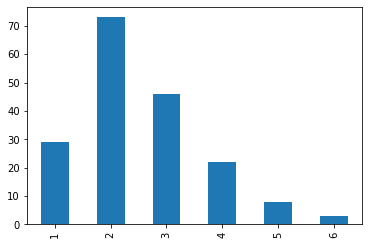

In [36]:
goals = wins_only['home_team_goal_count'].value_counts()
goals = goals.sort_index()
goals.plot(kind='bar')

(array([ 2., 13., 22., 18., 22., 21., 31., 22., 19., 11.]),
 array([23. , 28.7, 34.4, 40.1, 45.8, 51.5, 57.2, 62.9, 68.6, 74.3, 80. ]),
 <a list of 10 Patch objects>)

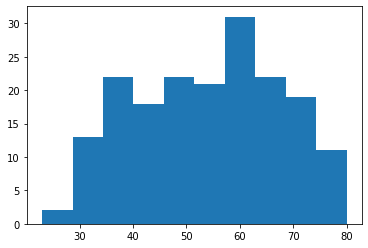

In [14]:
plt.hist(wins_only["home_team_possession"])

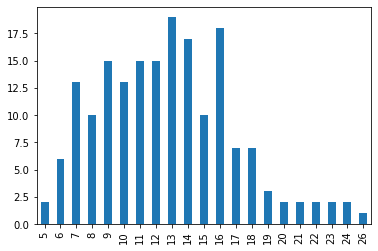

In [37]:
shots = wins_only['home_team_shots'].value_counts()
shots = shots.sort_index()
shots.plot(kind='bar')

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
1,1,40,11,L
3,0,66,11,L
4,0,37,6,L
9,0,42,8,L
14,1,61,9,L
...,...,...,...,...
370,1,23,6,L
371,1,39,12,L
373,0,68,11,L
376,0,73,21,L


In [16]:
lose_only['home_team_goal_count'].value_counts()

0    66
1    55
2     7
Name: home_team_goal_count, dtype: int64

,home_team_goal_count,home_team_possession,home_team_shots,home_team_result
6,2,57,10,D
8,0,47,10,D
10,0,51,8,D
20,1,28,9,D
21,2,49,16,D
...,...,...,...,...
367,1,35,6,D
368,1,70,14,D
374,0,46,8,D
377,1,53,7,D


In [18]:
draw_only['home_team_goal_count'].value_counts()

1    32
0    22
2    15
3     2
Name: home_team_goal_count, dtype: int64

In [19]:
minValuesObj = df["home_team_possession"].min()
minValuesObj

18

(array([29., 73., 46., 22.,  8.,  3.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <a list of 6 Patch objects>)

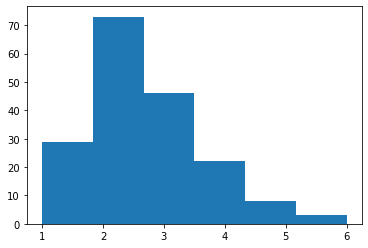

In [20]:
plt.hist(wins_only["home_team_goal_count"], bins=6)

### References
[1] footystats.org; https://footystats.org/download-stats-csv <br>
[2] How to get column names in Pandas dataframe; https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/ <br>
[3] note.nkmk.me; https://note.nkmk.me/en/python-numpy-where/ <br>
[4] stackoverflow.com; https://stackoverflow.com/questions/39109045/numpy-where-with-multiple-conditions <br>
[5] stackoverflow.com; https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values <br>
[6] 
